In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# %matplotlib inline
import numpy as np
import seaborn as sns
import urllib, os
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report
import warnings
# warnings.filterwarnings("ignore")
#-*-coding;utf-i-*-
df = pd.read_csv('gangseo_combine.txt' , sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'gangseo_combine.txt'

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7957 non-null   int64  
 1   acdnt_no                  7957 non-null   int64  
 2   acdnt_code                7957 non-null   int64  
 3   acdnt_dc                  7957 non-null   object 
 4   acdnt_gae_code            7957 non-null   int64  
 5   acdnt_gae_dc              7957 non-null   object 
 6   acdnt_hcode               7957 non-null   int64  
 7   acdnt_hdc                 7957 non-null   object 
 8   acdnt_mcode               7957 non-null   int64  
 9   acdnt_mdc                 7957 non-null   object 
 10  acdnt_year                7957 non-null   int64  
 11  dfk_code                  7957 non-null   int64  
 12  dfk_dc                    7957 non-null   object 
 13  dmge_vhcle_asort_code     7957 non-null   object 
 14  dmge_vhc

In [93]:
drop_list = [ 
        'acdnt_dc',
        'acdnt_code',
        'acdnt_gae_code',
        'acdnt_hcode',
        'acdnt_mcode',
        'dfk_code',
        'dmge_vhcle_asort_code',
        'dmge_vhcle_asort_hcode',
        'dmge_vhcle_asort_hdc',
        'engn_code',
        'legaldong_code',
        'lrg_violt_1_code',
        'rdse_sttus_code',
        'road_stle_code',
        'tmzon_div_1_code',
        'wether_sttus_code',
        'wrngdo_vhcle_asort_code',
        'wrngdo_vhcle_asort_hcode',
        'wrngdo_vhcle_asort_hdc',
        'road_div',
        'road_no',	
        'x_crdnt',
        'y_crdnt']
df = df.drop(labels=drop_list, axis=1)
df.head()

,Unnamed: 0,acdnt_no,acdnt_gae_dc,acdnt_hdc,acdnt_mdc,acdnt_year,dfk_dc,dmge_vhcle_asort_dc,legaldong_name,lrg_violt_1_dc,occrrnc_time_code,occrrnc_time_dc,rdse_sttus_dc,road_stle_dc,route_nm,tmzon_div_1_dc,wether_sttus_dc,wrngdo_vhcle_asort_dc,longtitude,latitude
0,0,2020010100100018,중상사고,차대차,기타,2020,수요일,승용,서울특별시 강서구 화곡동,안전운전불이행,1,01시,포장 - 건조,단일로 - 기타,가로공원로,야간,기타,승용,126.841586,37.538164
1,1,2020010100100110,경상사고,차대사람,기타,2020,수요일,보행자,서울특별시 강서구 화곡동,안전운전불이행,9,09시,포장 - 건조,교차로 - 교차로부근,곰달래로,주간,맑음,승용,126.842787,37.530248
2,2,2020010100100355,경상사고,차대차,정면충돌,2020,수요일,승용,서울특별시 강서구 화곡동,신호위반,23,23시,포장 - 건조,교차로 - 교차로안,화곡로,야간,맑음,이륜,126.851251,37.553919
3,3,2020010200100055,경상사고,차대사람,기타,2020,목요일,보행자,서울특별시 강서구 화곡동,안전운전불이행,7,07시,포장 - 건조,단일로 - 기타,None,주간,맑음,승용,126.845298,37.531731
4,4,2020010200100500,경상사고,차대차,측면충돌,2020,목요일,승용,서울특별시 강서구 개화동,안전거리미확보,21,21시,포장 - 건조,단일로 - 기타,일반국도48호선,야간,맑음,승용,126.797119,37.584534


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7957 non-null   int64  
 1   acdnt_no               7957 non-null   int64  
 2   acdnt_gae_dc           7957 non-null   object 
 3   acdnt_hdc              7957 non-null   object 
 4   acdnt_mdc              7957 non-null   object 
 5   acdnt_year             7957 non-null   int64  
 6   dfk_dc                 7957 non-null   object 
 7   dmge_vhcle_asort_dc    7957 non-null   object 
 8   legaldong_name         7957 non-null   object 
 9   lrg_violt_1_dc         7957 non-null   object 
 10  occrrnc_time_code      7957 non-null   int64  
 11  occrrnc_time_dc        7957 non-null   object 
 12  rdse_sttus_dc          7957 non-null   object 
 13  road_stle_dc           7957 non-null   object 
 14  route_nm               7957 non-null   object 
 15  tmzo

In [95]:
df.acdnt_hdc.value_counts(normalize=True)    

차대차     0.715094
차대사람    0.246198
차량단독    0.038708
Name: acdnt_hdc, dtype: float64

In [96]:
df = df[df.acdnt_hdc != '차량단독']
df.acdnt_hdc.value_counts(normalize=True)   
df.head()

,Unnamed: 0,acdnt_no,acdnt_gae_dc,acdnt_hdc,acdnt_mdc,acdnt_year,dfk_dc,dmge_vhcle_asort_dc,legaldong_name,lrg_violt_1_dc,occrrnc_time_code,occrrnc_time_dc,rdse_sttus_dc,road_stle_dc,route_nm,tmzon_div_1_dc,wether_sttus_dc,wrngdo_vhcle_asort_dc,longtitude,latitude
0,0,2020010100100018,중상사고,차대차,기타,2020,수요일,승용,서울특별시 강서구 화곡동,안전운전불이행,1,01시,포장 - 건조,단일로 - 기타,가로공원로,야간,기타,승용,126.841586,37.538164
1,1,2020010100100110,경상사고,차대사람,기타,2020,수요일,보행자,서울특별시 강서구 화곡동,안전운전불이행,9,09시,포장 - 건조,교차로 - 교차로부근,곰달래로,주간,맑음,승용,126.842787,37.530248
2,2,2020010100100355,경상사고,차대차,정면충돌,2020,수요일,승용,서울특별시 강서구 화곡동,신호위반,23,23시,포장 - 건조,교차로 - 교차로안,화곡로,야간,맑음,이륜,126.851251,37.553919
3,3,2020010200100055,경상사고,차대사람,기타,2020,목요일,보행자,서울특별시 강서구 화곡동,안전운전불이행,7,07시,포장 - 건조,단일로 - 기타,None,주간,맑음,승용,126.845298,37.531731
4,4,2020010200100500,경상사고,차대차,측면충돌,2020,목요일,승용,서울특별시 강서구 개화동,안전거리미확보,21,21시,포장 - 건조,단일로 - 기타,일반국도48호선,야간,맑음,승용,126.797119,37.584534


In [97]:
df['date'] = pd.to_datetime( df['acdnt_no'].astype(str).str[:8])
df['date'].head()

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-02
4   2020-01-02
Name: date, dtype: datetime64[ns]

In [98]:
df['time'] = pd.to_datetime(df['occrrnc_time_code'], format='%H').dt.hour

In [99]:
df.acdnt_gae_dc.value_counts(normalize=True)                

경상사고      0.660217
중상사고      0.270493
부상신고사고    0.060139
사망사고      0.009152
Name: acdnt_gae_dc, dtype: float64

In [100]:
df.acdnt_hdc.value_counts(normalize=True)    

차대차     0.743888
차대사람    0.256112
Name: acdnt_hdc, dtype: float64

In [101]:
df.acdnt_mdc.value_counts(normalize=True)    

기타            0.308276
측면충돌          0.289057
추돌            0.144594
횡단중           0.104197
정면충돌          0.048765
차도통행중         0.031246
측면직각충돌        0.030984
보도통행중         0.018172
길가장자리구역통행중    0.013204
후진중충돌         0.011505
Name: acdnt_mdc, dtype: float64

In [102]:
df.dfk_dc.value_counts(normalize=True)    

목요일    0.154922
금요일    0.153223
토요일    0.151262
수요일    0.150216
화요일    0.143810
월요일    0.140672
일요일    0.105896
Name: dfk_dc, dtype: float64

In [103]:
df.dmge_vhcle_asort_dc.value_counts(normalize=True)   

승용             0.470780
보행자            0.256112
이륜             0.094130
승합             0.051249
자전거            0.048372
화물             0.040397
원동기            0.029808
건설기계           0.004053
기타불명           0.001961
특수             0.001700
개인형이동수단(PM)    0.001177
사륜오토바이(ATV)    0.000131
농기계            0.000131
Name: dmge_vhcle_asort_dc, dtype: float64

In [104]:
df.legaldong_name.value_counts(normalize=True)   

서울특별시 강서구 화곡동     0.373121
서울특별시 강서구 등촌동     0.115963
서울특별시 강서구 방화동     0.104589
서울특별시 강서구 마곡동     0.090208
서울특별시 강서구 가양동     0.088770
서울특별시 강서구 염창동     0.064714
서울특별시 강서구 공항동     0.056216
서울특별시 강서구 내발산동    0.053994
서울특별시 강서구 개화동     0.028500
서울특별시 강서구 외발산동    0.019087
서울특별시 강서구 과해동     0.002484
서울특별시 강서구 오곡동     0.001438
서울특별시 강서구 오쇠동     0.000654
서울특별시 강서구         0.000131
서울특별시 강서구         0.000131
Name: legaldong_name, dtype: float64

In [105]:
df.lrg_violt_1_dc.value_counts(normalize=True)   

안전운전불이행      0.566871
신호위반         0.134920
안전거리미확보      0.103020
보행자보호의무위반    0.045104
중앙선침범        0.043012
교차로운행방법위반    0.030200
직진우회전진행방해    0.028370
기타           0.026932
차로위반         0.011505
불법유턴         0.006929
과속           0.002876
차로운행방법위반     0.000131
행자보호의무위반     0.000131
Name: lrg_violt_1_dc, dtype: float64

In [106]:
df.rdse_sttus_dc.value_counts(normalize=True)   

포장 - 건조        0.888351
포장 - 젖음/습기     0.059093
포장 - 기타        0.036083
포장 - 습기        0.010720
포장 - 서리/결빙     0.002484
포장 - 적설        0.001569
비포장 - 젖음/습기    0.000784
비포장 - 기타       0.000392
비포장 - 건조       0.000261
포장 - 해빙        0.000131
포장 - 결빙        0.000131
Name: rdse_sttus_dc, dtype: float64

In [107]:
df.road_stle_dc.value_counts(normalize=True)   

단일로 - 기타           0.465682
교차로 - 교차로안         0.255327
교차로 - 교차로부근        0.174794
기타 - 기타            0.051902
교차로 - 교차로횡단보도내     0.033338
단일로 - 횡단보도상        0.004968
단일로 - 교량           0.003399
주차장 - 주차장          0.002876
단일로 - 터널           0.002484
미분류 - 미분류          0.001569
단일로 - 횡단보도부근       0.001569
단일로 - 고가도로위        0.001177
단일로 - 지하차도(도로)내    0.000784
차로 - 교차로안          0.000131
Name: road_stle_dc, dtype: float64

In [108]:
df.tmzon_div_1_dc.value_counts(normalize=True)   

주간    0.545692
야간    0.454308
Name: tmzon_div_1_dc, dtype: float64

In [109]:
df.wether_sttus_dc.value_counts(normalize=True)   

맑음    0.888351
비     0.054386
흐림    0.040659
기타    0.013074
눈     0.003399
안개    0.000131
Name: wether_sttus_dc, dtype: float64

In [110]:
df.wrngdo_vhcle_asort_dc.value_counts(normalize=True)   

승용             0.655249
이륜             0.084978
화물             0.078311
승합             0.072951
자전거            0.052033
원동기            0.031638
기타불명           0.010459
건설기계           0.009805
개인형이동수단(PM)    0.002484
특수             0.002092
Name: wrngdo_vhcle_asort_dc, dtype: float64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7956
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             7649 non-null   int64         
 1   acdnt_no               7649 non-null   int64         
 2   acdnt_gae_dc           7649 non-null   object        
 3   acdnt_hdc              7649 non-null   object        
 4   acdnt_mdc              7649 non-null   object        
 5   acdnt_year             7649 non-null   int64         
 6   dfk_dc                 7649 non-null   object        
 7   dmge_vhcle_asort_dc    7649 non-null   object        
 8   legaldong_name         7649 non-null   object        
 9   lrg_violt_1_dc         7649 non-null   object        
 10  occrrnc_time_code      7649 non-null   int64         
 11  occrrnc_time_dc        7649 non-null   object        
 12  rdse_sttus_dc          7649 non-null   object        
 13  roa

In [128]:
#한글폰트 사용
import matplotlib.font_manager as fm
plt.rcParams['axes.unicode_minus'] = False
# fm.get_fontconfig_fonts()
# font_location = '.\D2Coding-Ver1.3-20171129.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'Gulim'

C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

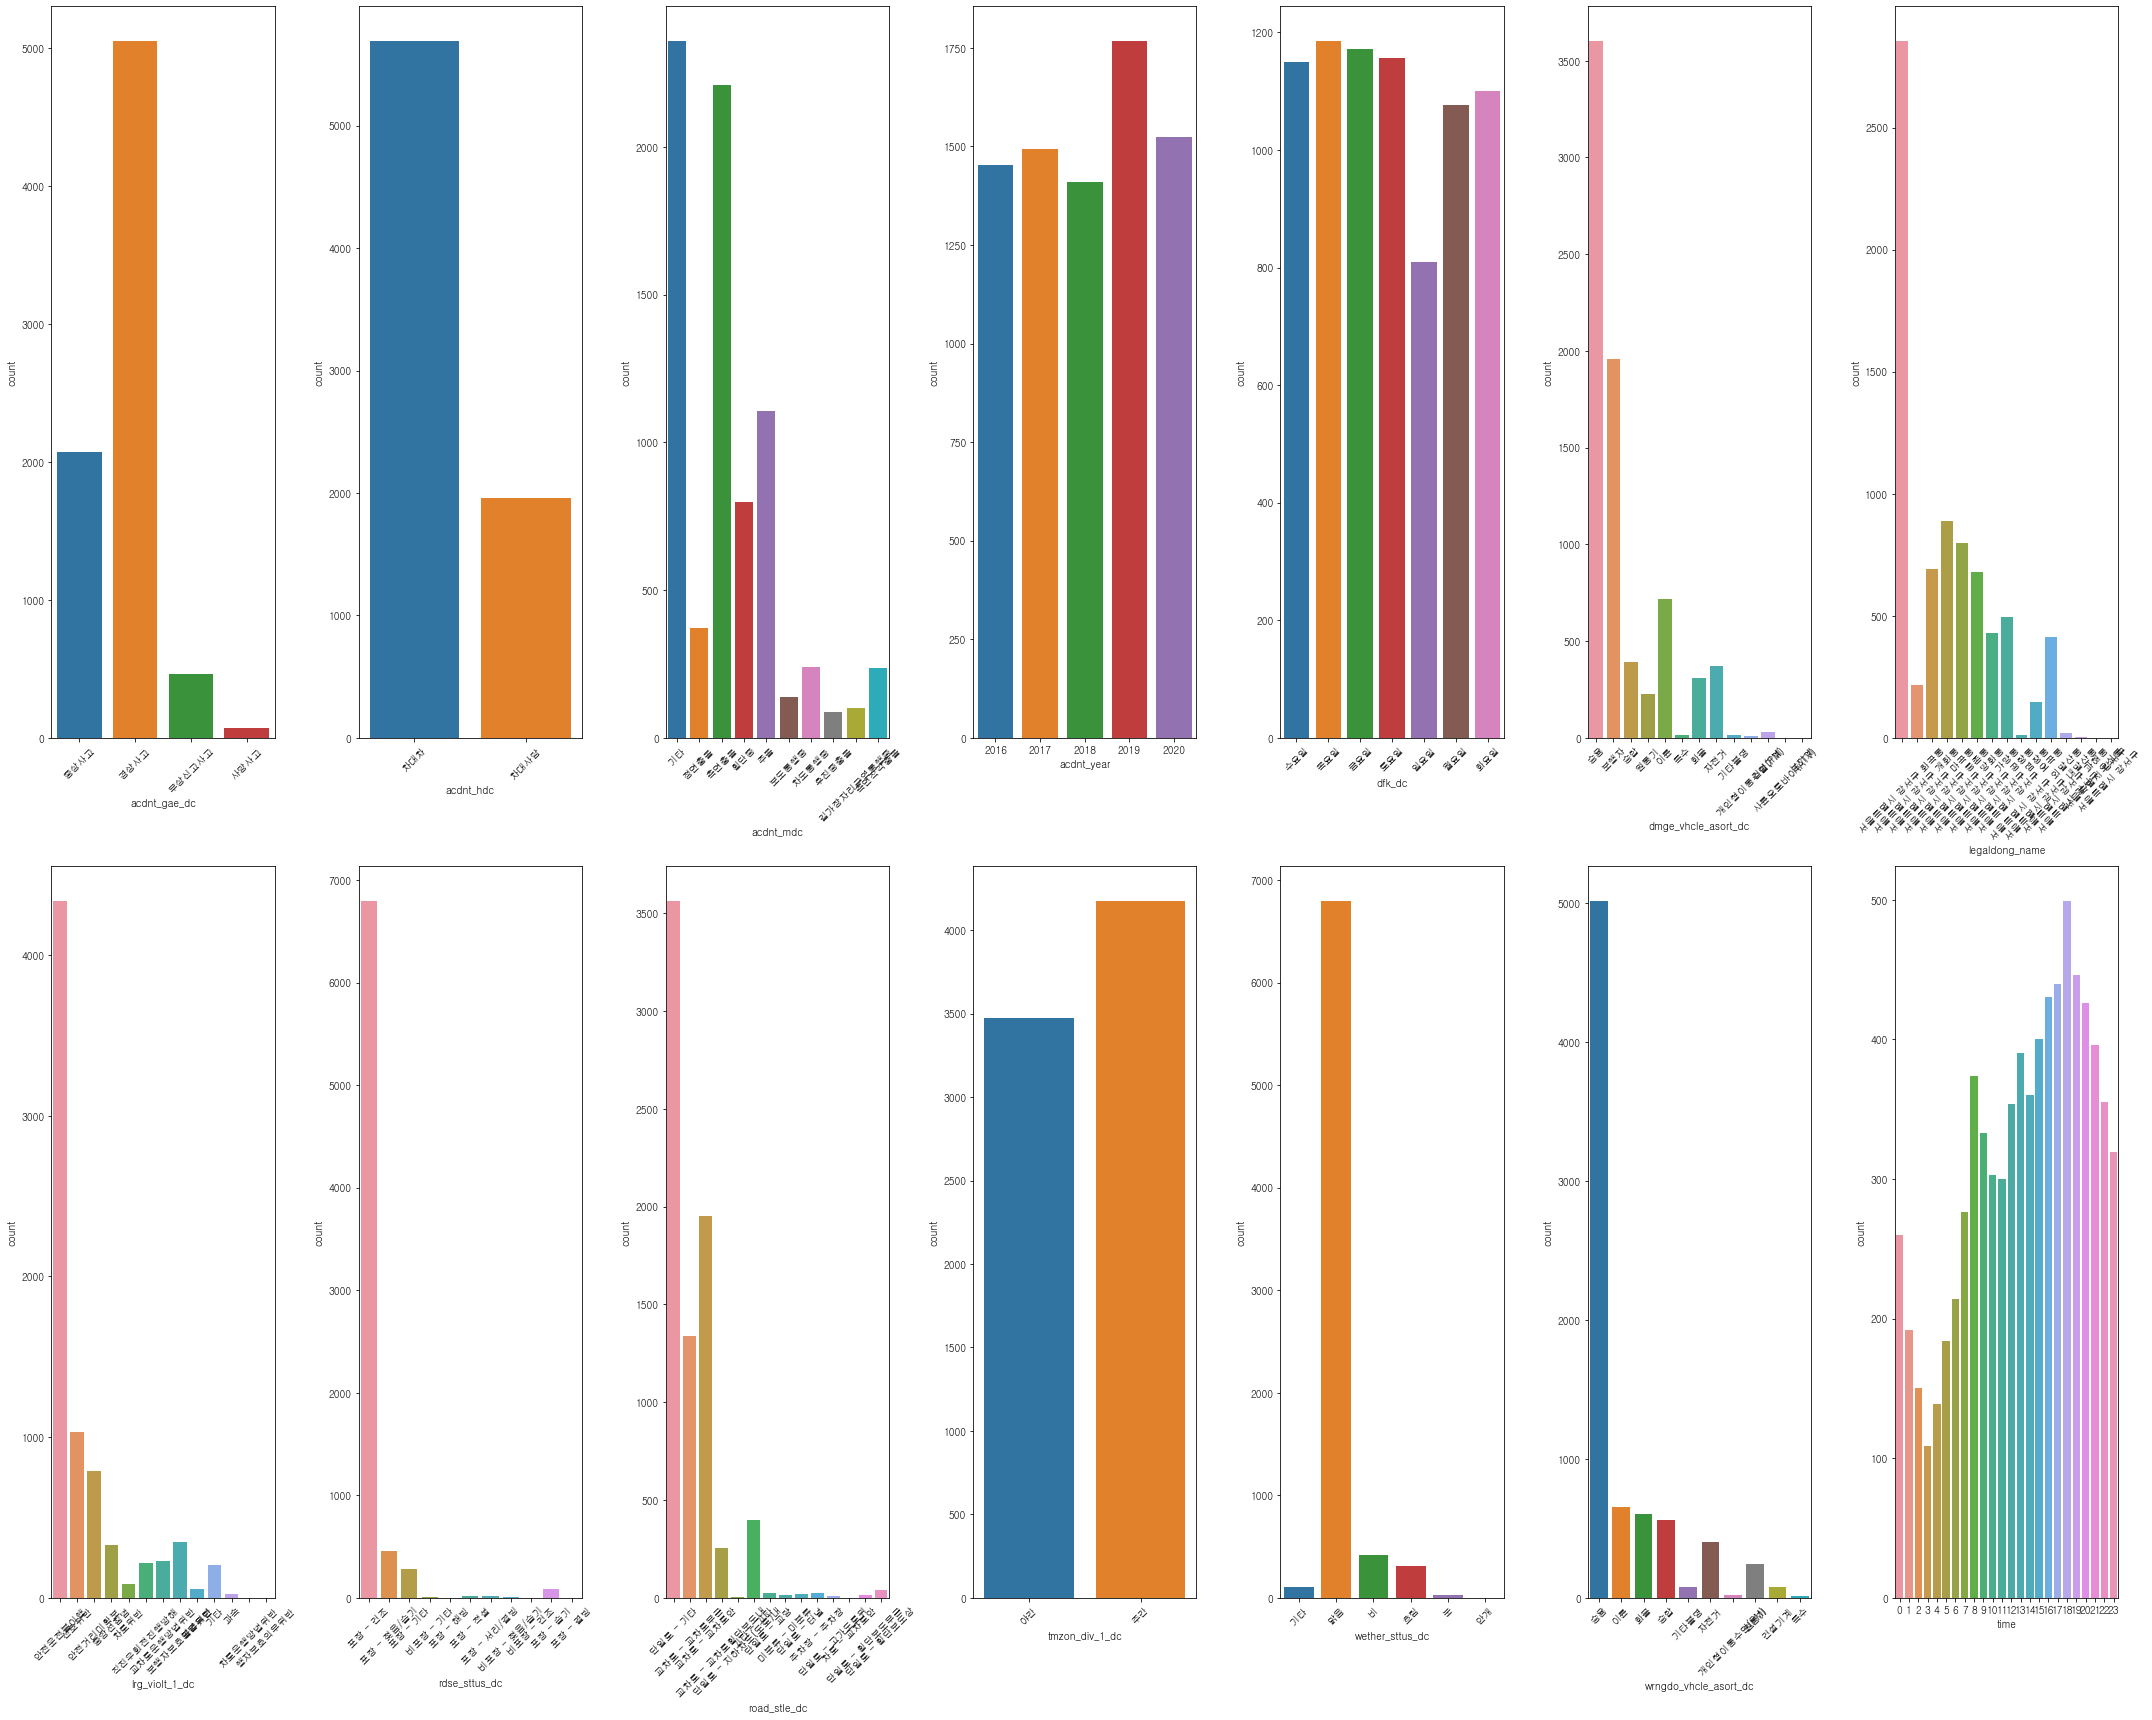

In [130]:
fig = plt.figure(figsize=(30,24))
ax1 = plt.subplot(271)
plt.xticks(rotation = 45 )
sns.countplot(df['acdnt_gae_dc'])
ax2 = plt.subplot(272)
plt.xticks(rotation = 45 )
sns.countplot(df['acdnt_hdc'])
ax3 = plt.subplot(273)
plt.xticks(rotation = 45 )
sns.countplot(df['acdnt_mdc'])
ax4 = plt.subplot(274)
sns.countplot(df['acdnt_year'])
ax5 = plt.subplot(275)
plt.xticks(rotation = 45 )
sns.countplot(df['dfk_dc'])
ax6 = plt.subplot(276)
plt.xticks(rotation = 45 )
sns.countplot(df['dmge_vhcle_asort_dc'])
ax7 = plt.subplot(277)
plt.xticks(rotation = 45 )
sns.countplot(df['legaldong_name'])
ax8 = plt.subplot(278)
plt.xticks(rotation = 45 )
sns.countplot(df['lrg_violt_1_dc'])
ax9 = plt.subplot(279)
plt.xticks(rotation = 45 )
sns.countplot(df['rdse_sttus_dc'])
ax10 = plt.subplot(2,7,10)
plt.xticks(rotation = 45 )
sns.countplot(df['road_stle_dc'])
ax11 = plt.subplot(2,7,11)
plt.xticks(rotation = 45 )
sns.countplot(df['tmzon_div_1_dc'])
ax12 = plt.subplot(2,7,12)
plt.xticks(rotation = 45 )
sns.countplot(df['wether_sttus_dc'])
ax13 = plt.subplot(2,7,13)
plt.xticks(rotation = 45 )
sns.countplot(df['wrngdo_vhcle_asort_dc'])
ax14 = plt.subplot(2,7,14)
sns.countplot(df['time'])
plt.tight_layout()

plt.show()

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7649.0,8.011885e+02,4.691289e+02,0.000000e+00,3.990000e+02,7.980000e+02,1.196000e+03,1.828000e+03
acdnt_no,7649.0,2.018121e+15,1.408623e+12,2.016010e+15,2.017042e+15,2.018082e+15,2.019102e+15,2.020123e+15
acdnt_year,7649.0,2.018055e+03,1.407460e+00,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
occrrnc_time_code,7649.0,1.333338e+01,6.371496e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01
longtitude,7649.0,1.268400e+02,1.956299e-02,1.267683e+02,1.268267e+02,1.268431e+02,1.268525e+02,1.270900e+02
latitude,7649.0,3.755344e+01,1.413320e-02,3.751637e+01,3.754259e+01,3.755431e+01,3.756248e+01,3.760282e+01
time,7649.0,1.333338e+01,6.371496e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01


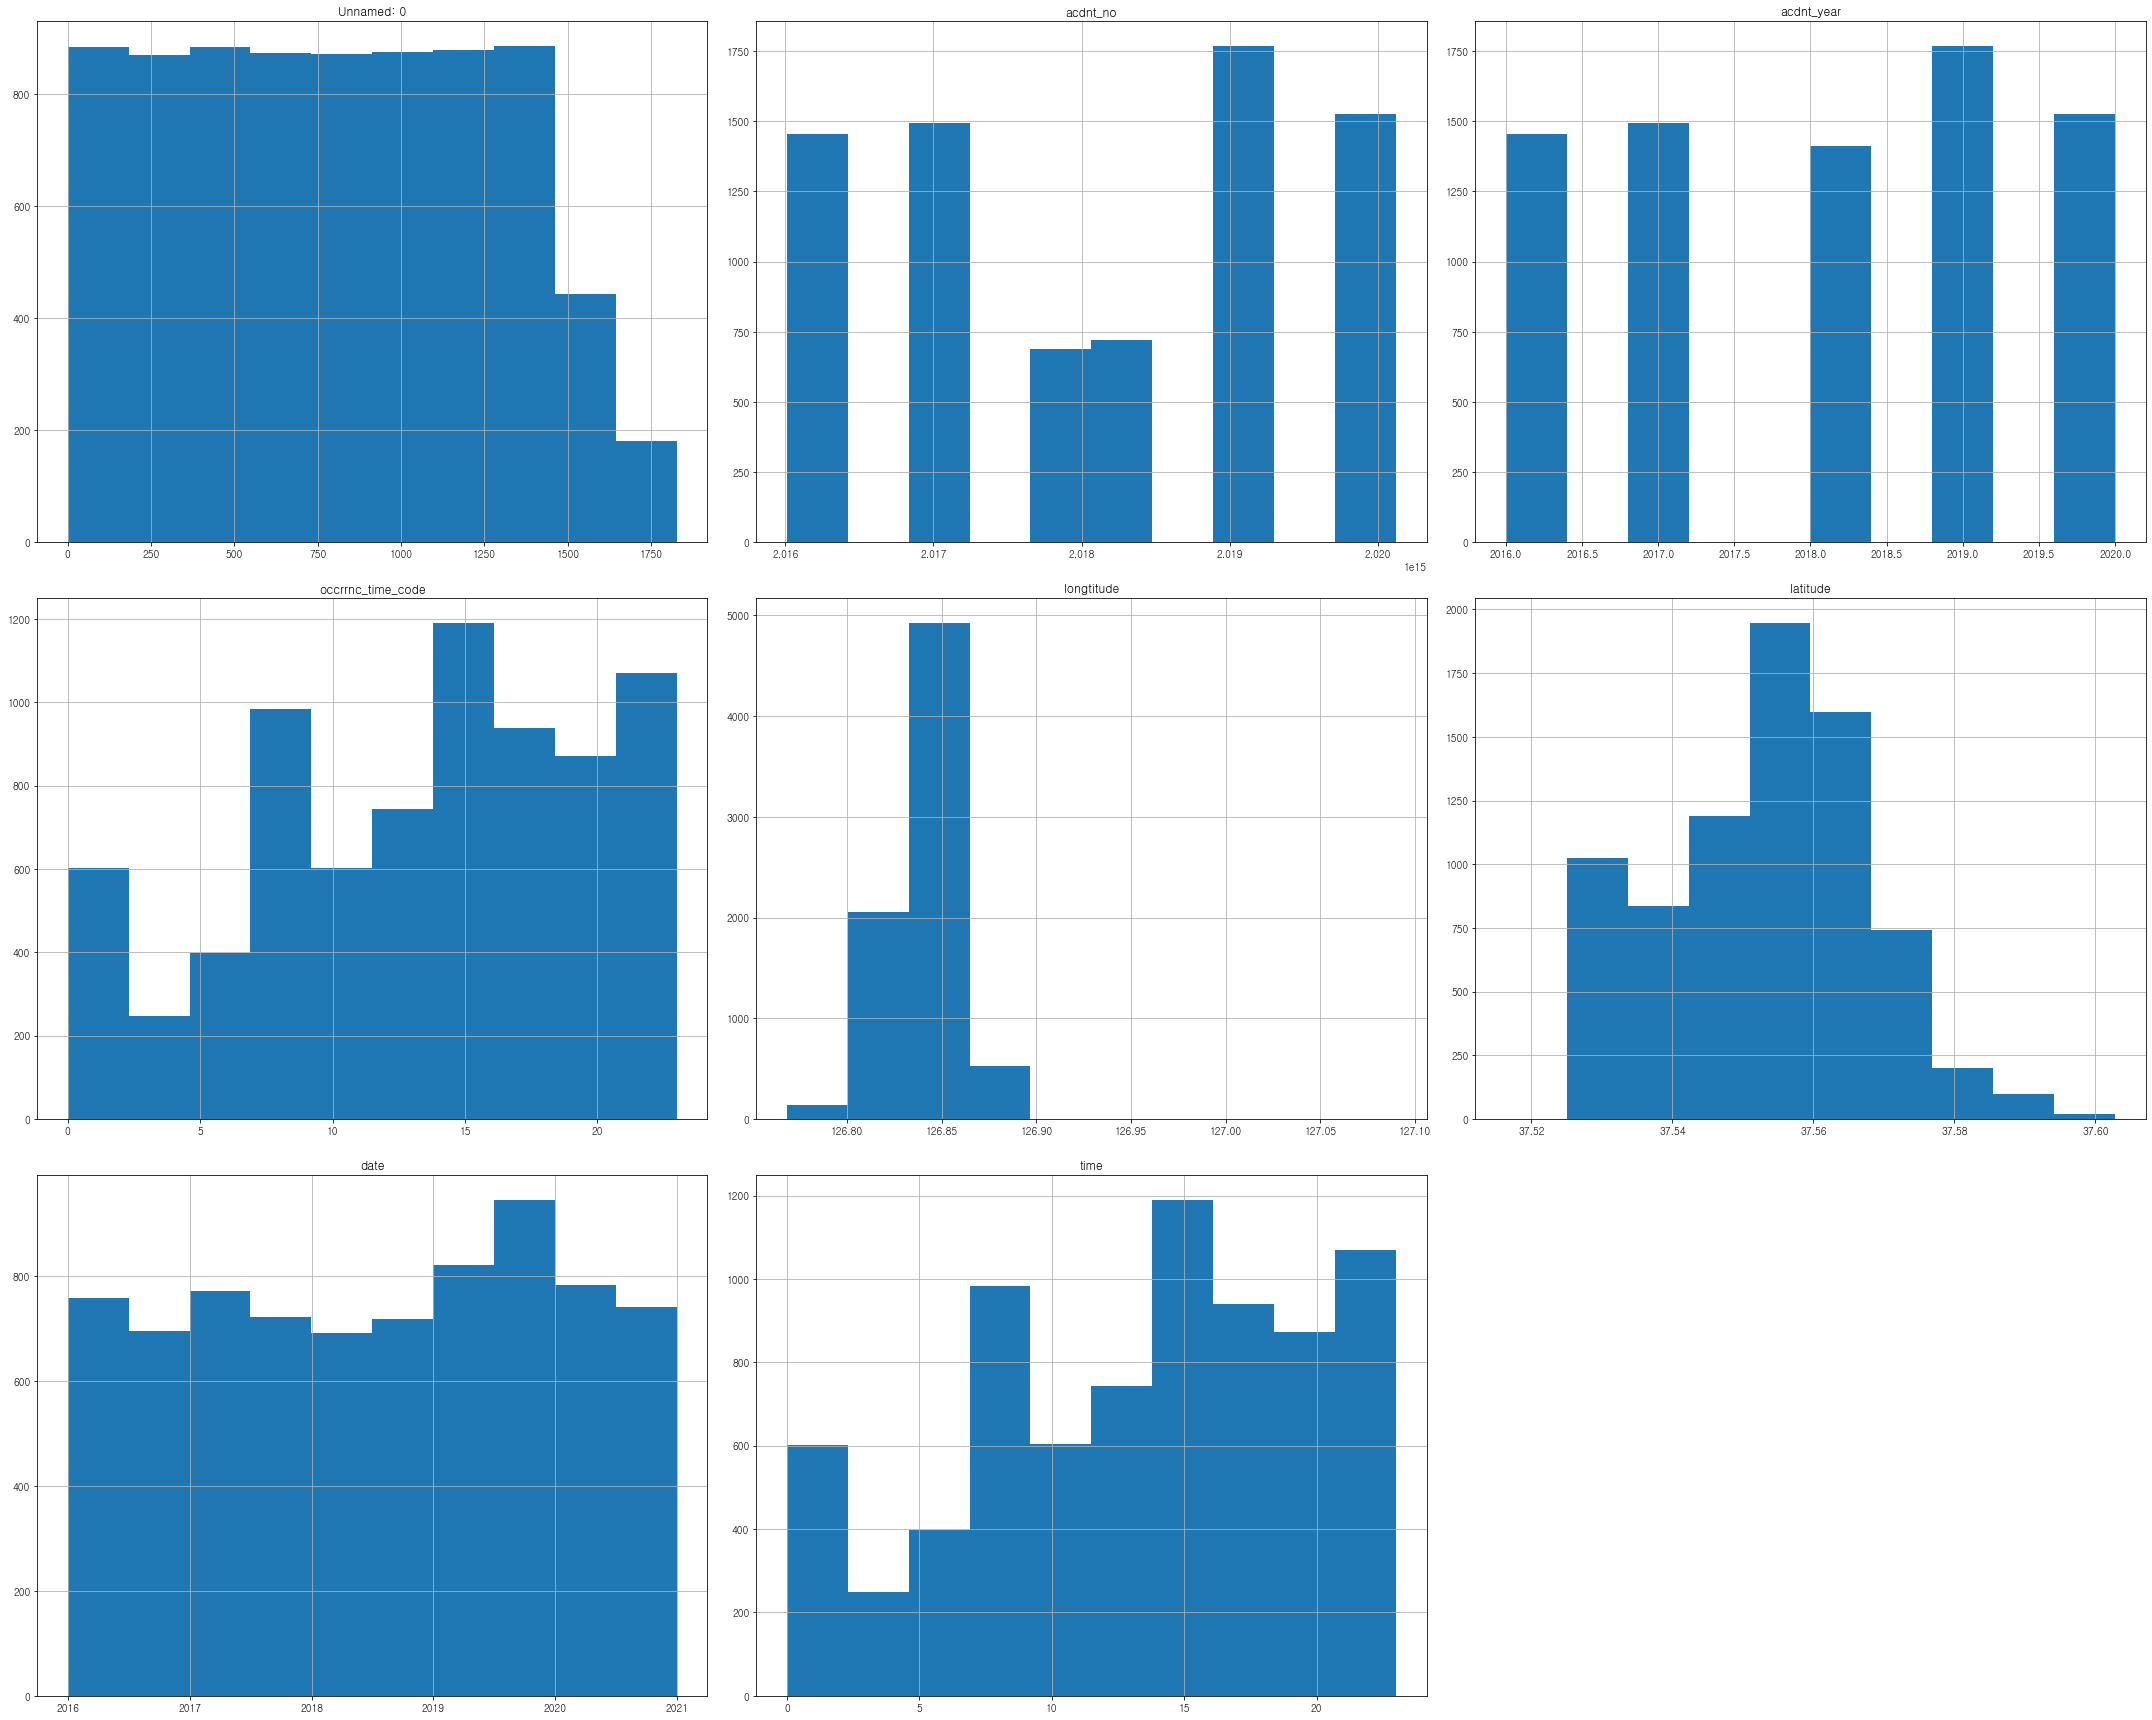

In [132]:
df.hist(figsize = (30,24))
plt.tight_layout()
plt.show()

<AxesSubplot:>

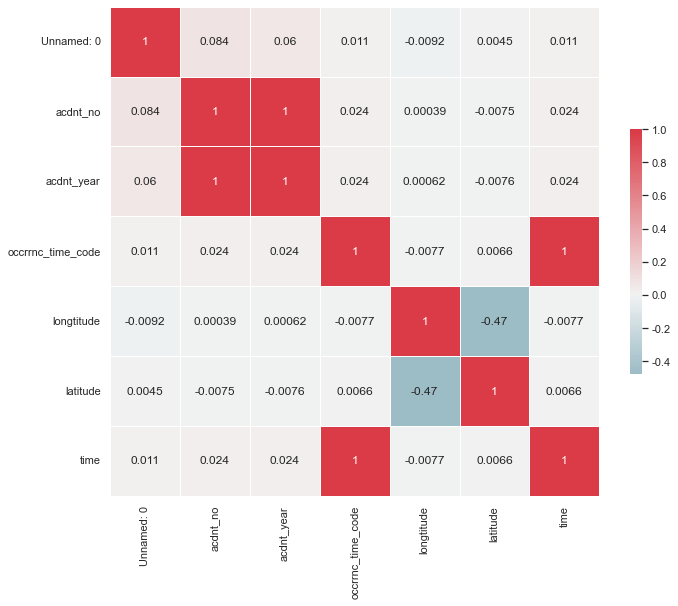

In [133]:
sns.set(style="white")
corr = df.corr()
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)